# Самостоятельный проект

По условиям я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

## Часть 1. Приоритизация гипотез.  

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.  

__Задача__  

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Начнем с импорта необходимых библиотек и чтения файла.

In [ ]:
import pandas as pd
from scipy import stats as st
import numpy as np
import datetime as dt


data = pd.read_csv('/datasets/hypothesis.csv')

pd.set_option('display.float_format', '{:_.2f}'.format)
pd.set_option('display.max_colwidth', 200)
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Мы видим, что названия столбцов не соотвествуют общепринятым нормам. Приведем их к нижнему регистру.

In [ ]:
data.columns = data.columns.str.lower()

data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Теперь приотизируем гипотезы при помощи метода ICE. Расчитаем параметр ICE по формуле `ice = impact*confidence/efforts`. Значения возмем из полученой теблицы гипотез, а результат запишем в столбец `ICE`.  
Отсортируем по убыванию приоритета.

In [ ]:
data['ICE'] = (data['impact'] * data['confidence'] / data['efforts'])

display(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Методом ICE наиболее приоритетными для проверки получились гипотезы: 
- 8. Запустить акцию, дающую скидку на товар в день рождения
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок 
  
   
Теперь для приотизации применим метод RICE. Параметр RICE расчитаем по формуле `RICE = reach*impact*confidence/efforts`. Значения возмем из полученой теблицы гипотез, а результат запишем в столбец `RICE`.  
Отсортируем по убыванию приоритета.

In [ ]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence']/data['efforts']

display(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


При использовании метода RICE приоритеты проверки гипотез оказались другими. Наиболее важными стали гипотезы:  
- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
  
Гипотезы 7 и 0 уже были в лидерах. Но лидирующая в методе ICE 8 гепотеза в методе RICE оказалась лишь на пятом месте. Зато в тройке приоритетных гепотез появилась гепотеза 2, ранее занимавшая лишь пятое место.  
  
Произошло это потому, что у методов ICE и RICE есть одно существенное различие - метод ICE не учитывает скольких пользователей затронет гипотеза. Гипотеза 8 о предоставлении скидки на товар явно охватит меньше пользователей, потому будет менее приорететна. 

## Часть 2. Анализ A/B-теста  
  
По заданию мы уже провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.  
  
__Задача__  
  
Проанализировать A/B-тест:  

1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
13. Принять решение по результатам теста и объяснить его.  
Варианты решений: 
  1. Остановить тест, зафиксировать победу одной из групп. 
  2. Остановить тест, зафиксировать отсутствие различий между группами. 
  3. Продолжить тест.


Прочитаем файлы с результатами А/В-тестов и запишем их в переменные `orders` и `visitors`.

In [ ]:

orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
ordersA = orders[orders['group']=='A']['visitorId'].unique()
ordersB = orders[orders['group']=='B']['visitorId'].unique()
k=0
visitor_double = []
for i in range(len(ordersB)):
    for j in range(len(ordersA)):
        if ordersB[i] == ordersA[j]:
            visitor_double.append(ordersB[i])
            k=k+1

print('Количество пользователей в группе А:', len(ordersA))
print('Количество пользователей в группе В:', len(ordersB))
print('Количество пересекающихся пользователей в группах:',k)

Количество пользователей в группе А: 503
Количество пользователей в группе В: 586
Количество пересекающихся пользователей в группах: 58


#### Пункт 1.
Построим график кумулятивной выручки по группам.  
Для начала соберем массив уникальных пар дат и значений групп теста.  
Затем в переменные `ordersAggregated` и `visitorsAggregated` запишем агрегированные кумулятивные данные.  
Объеденим их в одну таблицу `cumulativeData`.


In [ ]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Теперь построим непосредственно график кумулятивной выручки по группам.

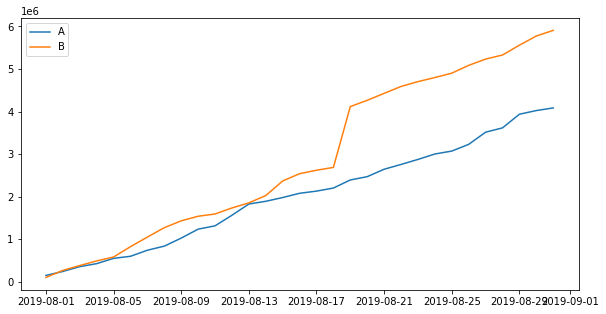

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.show()

Видим, что группа В постоянно обгоняет группу А по выручке. Однако, примерно 18-20 августа в группе В произошел резкий скачек увеличения выручки, это может сигнализировать об увеличении числа заказов, либо о появлении очень дорогого заказа. После скачка, увеличив разрыв между выручками групп А и В, графики прожолжили так же плавно увеличиваться.  
Поэтому мы можем сделать вывод, что далее нам необходимо проверить аномальные данные.  
  
#### Пункт 2.
Построим график кумулятивного среднего чека по группам.  
  
Для того, чтобы построить графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

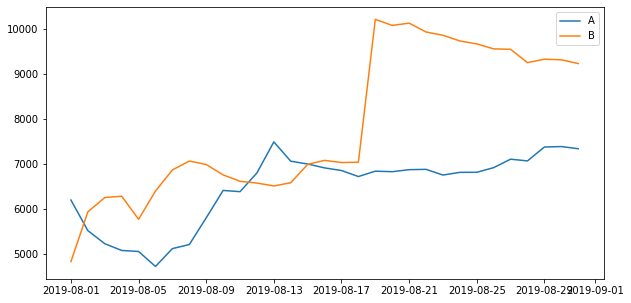

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.show()

Вместо того, чтобы к концу теста средний чек становился более равномерным, мы снова видим резкий скачек группы В в районе 18-20 августа.  
Становиться еще более ясно, что скорее всего, в эти даты в группу В попали крупные заказы.  

#### Пункт 3.
Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

Соберем данные в одну таблицу и запишем их в переменну `mergedCumulativeRevenue`. Затем построим отношение средних чеков.

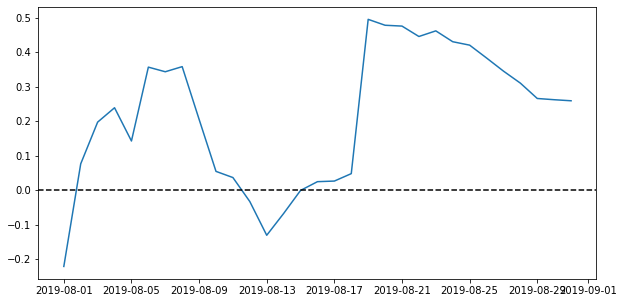

In [ ]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

Видим резкие скачки. В целом группа В, как и ожидалось, пактически все время обгоняет А.
Внимание привлекают резкие скачки: конечно же, в районе 18-20 августа для группы В и 13 августа для группы А.  
  
#### Пункт 4.
Построим график кумулятивной конверсии по группам.  
Аналогично выручке проанализируем кумулятивную конверсию для групп А и В.  

Посчитаем кумулятивную конверсию, запишем ее в столбец `cumulativeData['conversion']`.  
В переменные `cumulativeDataA` и `cumulativeDataB` выделим данные по группам А и В.  
И наконец построим график кумулятивной конверсии.

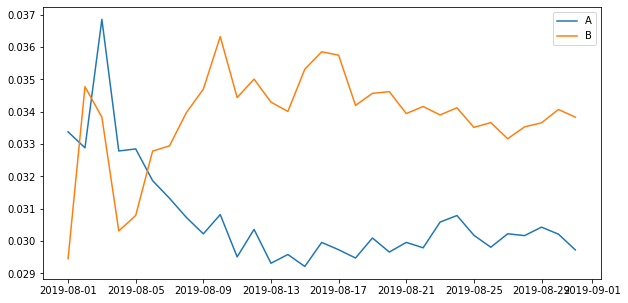

In [ ]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(10, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.show()

График получился достаточно симметричным. В начале теста данные колебались. Затем в лидерство вышла группа В и данные зафиксировались.

#### Пункт 5.
Построим график относительного изменения кумулятивной конверсии группы B к группе A.

Соберем необходимые данные в таблицу `mergedCumulativeConversions` и построим отношение кумулятивной конверсии группы В к группе А.

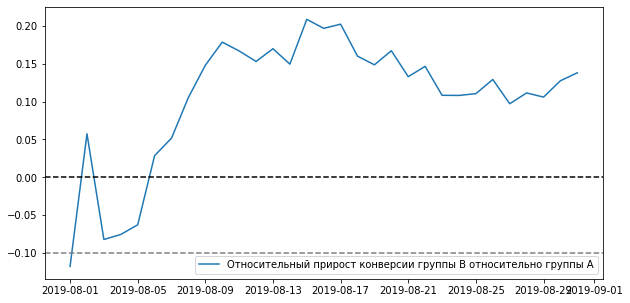

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.show()

В начале теста имелись колебания, но достаточно быстро группа В выбралась вмеред и продолжила держать лидерство до окончания теста.

#### Пункт 6.
Построим точечный график количества заказов по пользователям.  
Теперь нужно изучить аномальные данные в тесте. У нас уже было предположение о крупных заказах или большом количестве заказов о доин день. Проверим его.  

Сгруппируем данные по пользователям и посчитаем количество уникальных заказов.
Построим точесную гистограмму значений.

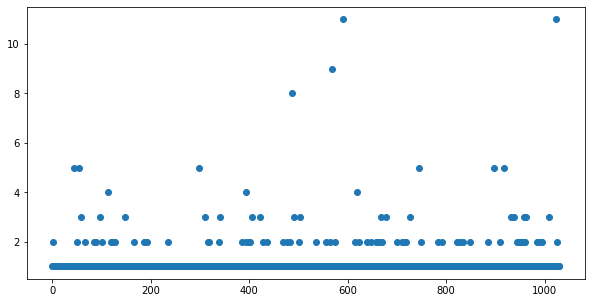

In [ ]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

Видим, что даже 4 заказа на пользователя встречается не часто, а максимальное количество в 11 заказов и вовсе кажется аномальным.

#### Пункт 7.
Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.  
Определим границы по которым сможем отсечь аномальные данные, обычно это 1-5% данных.

In [ ]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей сделали более 2 заказов, и не более 1% заказали более 4 раз.  
Исходя из этого, можем выбрать границу в 4 заказа.

#### Пункт 8.
Аналогично построим точечный график стоимостей заказов.


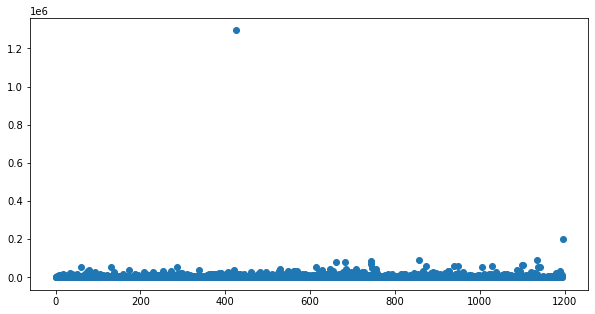

In [ ]:
plt.figure(figsize=(10, 5))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.show()

Вот и обнаружился аномальный заказ, который оставил скачок на графиках.

#### Пункт 9.
Посчитаем 95-й и 99-й перцентили стоимости заказов.  
За исключением единственного сильно выбивающегося заказа, остальные лежат в нижней плоскости. Попробуем определить границы, по котором удобно будет отделить аномально дорогие заказы.

In [ ]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% заказов имели стоимость выше 28000, и не более 1% имели стоимость выше 58233,2.  
Исходя из данных, я взяла границу в 58233,2.

#### Пункт 10.
Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.  
Для начала подготовим данные, и соберем их все в одну объеденяющую таблицу.

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Теперь в `sampleA` и `sampleB` сохраним выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль.  
Поэтому чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке методом `mean`.  
Затем применим тест `stats.mannwhitneyu()` для получения p-value - статистической вероятности подтверждения гипотезы о равенстве данный группы А и В.  
А так же введем относительный прирост, как `sampleB.mean() / sampleA.mean() - 1`.

In [ ]:
import scipy.stats as stats

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


0.017
0.138


По результатам теста p-value = 1,7%. Это меньше alpha = 5%, а значит нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет мы отвергаем. И считаем, что конверсия между группами А и В разная.  
Относительный прирост группы В по сравнению с А составляет 13,8%.

#### Пункт 11.
Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.  
Аналогично получим p-value использую тест `stats.mannwhitneyu()` и относительный прирост.

In [ ]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


По результатам теста p-value = 72,9% - это значительно больше alpha = 5%, а значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.  
При этом средний чек группы В на 25% выше среднего чека группы А.  
  
#### Пункт 12.
Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.  
Ранее с помощью определения перцентилей мы взяли за границы отсечения аномальных значений значения в 4 заказа и 58233,2 стоимости заказа.  

Теперь очистим данные и снова определим статистическую вероятность и относительный прирост.

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.014
0.153


По новым данным p-value = 1,4%. Не сильно отличается от прежних 1,7%. А значит мы по прежнему отвергаем гипотезу о том, что статистически значимых различий в конверсии между группами нет.
А относительный припрост группы В относительно группы А теперь равен 15,3%.

#### Пункт 13.
Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.  
Аналогично посчитаем статистическую вероятность и относительный прирост для среднего чека.

In [ ]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.851
-0.006


По новым данным p-value = 85,1%, оно стало еще больше, поэтому мы все так же считаем, что причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.  
А вот прирост изменился на незначительную убыль. И теперь группа В концу теста отстает на 0,6%. Но в целом мы можем считать, что средние чеки выровнялись.  
  
#### Пункт 14.
Примем решение по результатам теста.
Итак, что мы имеем?  
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и по «очищенным» данным;
- Нет статистически значимого различия по среднему чеку между группами А и В ни по «сырым», ни по «очищенным» данным;
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A;
- Учитывая прирост конверсии между группами, можно утверждать, что конверсия группы В значительно лучше, конверсии граппы А;
- График среднего чека дал нам понять, что в данных есть аномальные заказы, так как в нем присутствовал сильный скачок;
- Обращаясь приросту различия среднего чека после удаления аномально дорогого заказа, мы видим, что значения среднего чека между группами А и В практически сравнялись. По очищенным данным они составили различие составило всего 2%.

И всего этого, можно сделать вывод о том, что А/В-тест можно заканчивать. При установившихся средних чеках, мы видим значительную разницу в конверсии участников группы В относительно группы А.
Тест можно считать успешным, так как нам удалось выяснить, что нововедения применяемые в группе В дадут нам значительный прирост конверсии.